# Sine function ver 0.01

- 0.00 - 사인 함수 생성
- 0.01 - annotation 추가

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

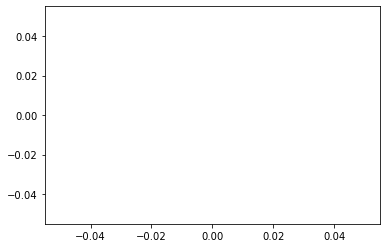

In [26]:
# fig object (비우는게 최고다)
fig, ax = plt.subplots()
xdata1, ydata1, xdata2, ydata2 = [], [], [], []
ln1, = plt.plot([], [], 'g-', markevery=np.pi)
ln2, = plt.plot([], [], 'b-', markevery=np.pi)

# annotation 추가
annotation = ax.annotate(
    'annotation', xy=(1,0), xytext=(-1,0),
    arrowprops = {'arrowstyle': "->"})

In [52]:
#func
def update(frame) : # 이 함수의 실행을 통해서 ln에 데이터를 추가해야한다.
    
    # frames의 iterable을 에 추가
    xdata1.append(frame) 
    ydata1.append(4 * np.sin(frame)) 
    xdata2.append(frame) 
    ydata2.append(2 * np.sin(frame))
    
    # line object에 데이터를 매번 세팅 (어레이 전체로!)
    ln1.set_data(xdata1, ydata1) 
    ln2.set_data(xdata2, ydata2)
    annotation.set_position((xdata1[-1]+1, ydata1[-1]+1))
    annotation.xy = (xdata1[-1], ydata1[-1])
    annotation.set_text(f'{round(ydata1[-1], 2)}')

    # 이전 데이터 전체를 이용한 line 리턴
    return ln1, ln2, annotation,

#frames = 좌표 전체를 만듬(array)
x = np.arange(0, 6*np.pi, 0.1) 

In [53]:
#init = 초기 그래프 설정값을 만듬 (이것은 변하지 않는다.)
def init() :
    ax.set_xlim(0, 6*np.pi)
    ax.set_ylim(-6, 6)
    ax.axhline(2, color="black", ls='--', lw=0.5)
    ax.axhline(-2, color="black", ls='--', lw=0.5)
    ax.axhline(4, color="black", ls='--', lw=0.5)
    ax.axhline(-4, color="black", ls='--', lw=0.5)
    ax.axvline(6*np.pi/2, color="black", ls='--', lw=0.5)
    return ln1, ln2

In [54]:
# FuncAnimation을 통해서 빌드 
ani = FuncAnimation(fig, update, frames=x, init_func=init, interval=100, blit=True)
# 초기 figure, func(rendering), all values, init_func, interval = 딜레이, blit = 나중에 확인
f = r"C:\Users\ikema\Desktop\Matplotlib Animation\sine animation.mp4" #경로 설정 
writermp4 = animation.FFMpegWriter(fps=10) #write를 어떤 코덱을 사용할 것인가. (ex)FFMpegWriter(fps=24)
ani.save(f, writer=writermp4, dpi=100) #저장 